In [1]:
import pandas as pd
data = pd.read_excel('crux.xlsx')
data.head()



,prakriti,Progressive,Relapsing,seasonal,stationary,site,duration in years,Scorad score,severity
0,KP,1.0,NaN,NaN,NaN,Axilla,2.0,18.8,mild
1,VP,1.0,NaN,NaN,NaN,neck hand,5.0,49.9,severe
2,KP,NaN,1.0,NaN,NaN,both legs,1.5,28.9,moderate
3,VP,1.0,NaN,NaN,NaN,both elbows,0.5,50.8,severe
4,VP,NaN,NaN,NaN,1.0,both hands,2.0,64.1,severe


In [2]:
# Separate features and labels
from sklearn.preprocessing import LabelEncoder
data=data.fillna(0)

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'Weather' column
data['prakriti'] = label_encoder.fit_transform(data['prakriti'])
data['site'] = label_encoder.fit_transform(data['site'])

features = ['prakriti','site','Progressive','Relapsing','seasonal','stationary','duration in years']
label = 'Scorad score'
X = data[features].values
y = data[label].values

print('Features:',X[:4],'\nLabels:', y[:4], sep='\n')
for n in range(0,4):
    print("Patient", str(n+1), "\n  Features:",list(X[n]), "\n  Label:", y[n])

Features:
[[ 0.   0.   1.   0.   0.   0.   2. ]
 [ 2.  25.   1.   0.   0.   0.   5. ]
 [ 0.  12.   0.   1.   0.   0.   1.5]
 [ 2.   8.   1.   0.   0.   0.   0.5]]

Labels:
[18.8 49.9 28.9 50.8]
Patient 1 
  Features: [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 2.0] 
  Label: 18.8
Patient 2 
  Features: [2.0, 25.0, 1.0, 0.0, 0.0, 0.0, 5.0] 
  Label: 49.9
Patient 3 
  Features: [0.0, 12.0, 0.0, 1.0, 0.0, 0.0, 1.5] 
  Label: 28.9
Patient 4 
  Features: [2.0, 8.0, 1.0, 0.0, 0.0, 0.0, 0.5] 
  Label: 50.8


In [3]:
#distributing data
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 70 rows
Test Set: 30 rows


In [4]:
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)

LinearRegression()


In [5]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [47. 46. 49. 61. 50. 46. 57. 60. 60. 47.]
Actual labels   :  [37.4 44.3 28.9 65.1 52.1 52.2 48.3 61.2 65.1 48.2]


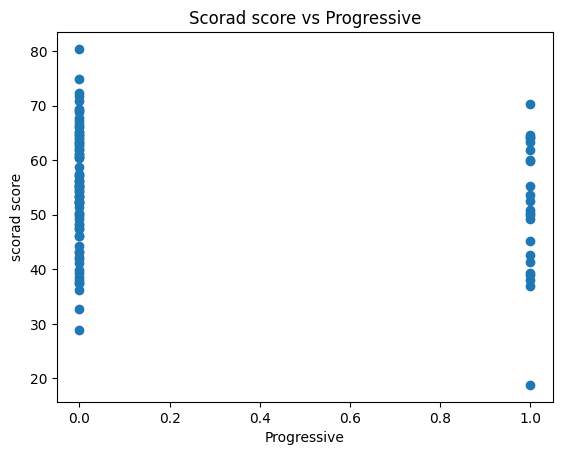

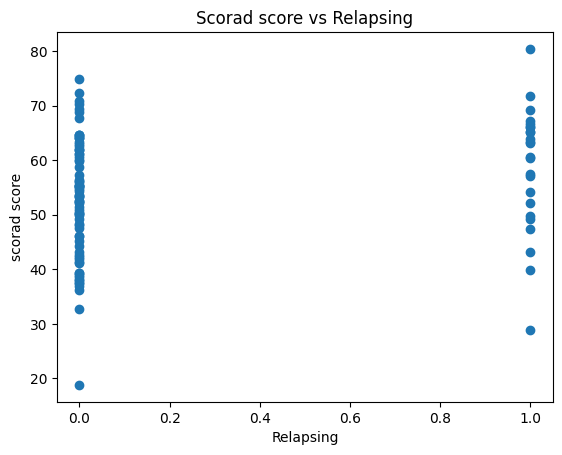

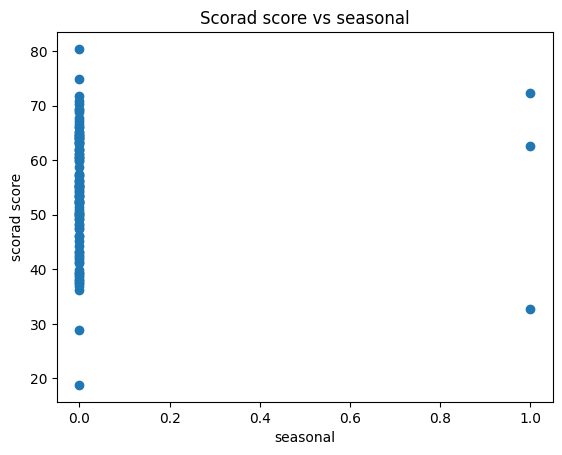

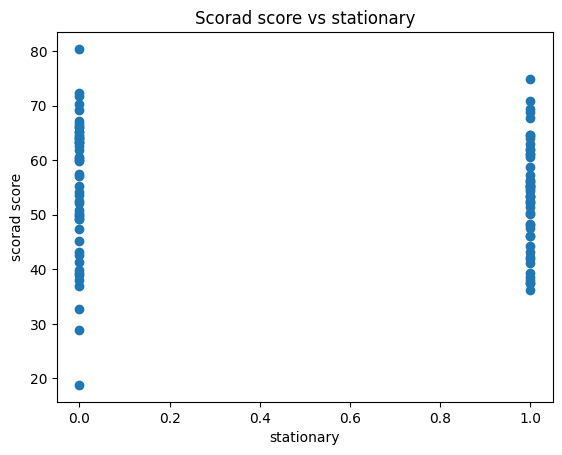

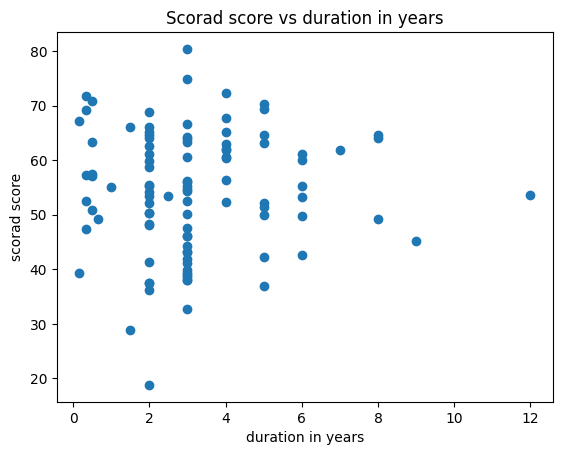

<Figure size 640x480 with 0 Axes>

In [6]:
#making scatter plots
import matplotlib.pyplot as plt
#finding correlation
numfeature=['Progressive','Relapsing','seasonal','stationary','duration in years']
label=['Scorad score']
for col in numfeature:
    a=data[col]
    plt.scatter(x=a, y=data[label],label=col)
    plt.title('Scorad score vs '+str(col))
    plt.xlabel(col) 
    plt.ylabel('scorad score')
    plt.show()
plt.tight_layout()

Predicted labels:  [47. 46. 49. 61. 50. 46. 57. 60. 60. 47. 60. 43. 60. 46. 58. 46. 59. 58.
 54. 54. 48. 59. 53. 58. 57. 50. 46. 57. 58. 41.]
Actual labels   :  [37.4 44.3 28.9 65.1 52.1 52.2 48.3 61.2 65.1 48.2 69.2 38.9 66.1 38.
 68.9 37.5 54.3 54.8 64.3 63.3 52.3 56.3 50.8 53.6 64.1 49.8 57.2 70.8
 62.1 39.3]


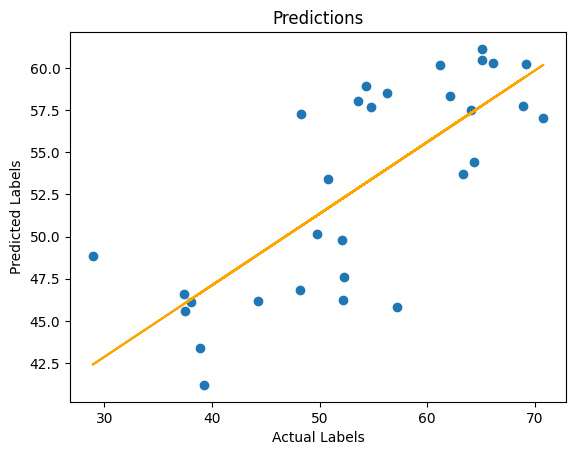

In [7]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:100])
print('Actual labels   : ' ,y_test[:100])

import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='orange')
plt.show()


In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 56.37687060496634
RMSE: 7.508453276472215
R2: 0.5342415657770021
